In [92]:
import pandas as pd
import neattext.functions as nfx
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob
import numpy as np


In [93]:
data = pd.read_csv("C:/Users/Nasibullah Qarizada/Desktop/dataset.csv",)
data.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.510000e+23,1.510000e+23,2022-04-15 02:24:13 Turkey Standard Time,15.04.2022,02:24:13,300,1.400000e+22,blurbs_s,Bet’s Blurbs,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1.510000e+23,1.510000e+23,2022-04-15 02:19:25 Turkey Standard Time,15.04.2022,02:19:25,300,8.230000e+22,sandyk1971,Sandy King,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'DaphneSheaves', 'name': 'Dap...",NaN,NaN,NaN,NaN
2,1.510000e+23,1.510000e+23,2022-04-15 02:19:10 Turkey Standard Time,15.04.2022,02:19:10,300,1.460000e+23,weikelsherry,Sherry Weikel Weikels,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': '0ld_School_', 'name': 'Anti-...",NaN,NaN,NaN,NaN
3,1.510000e+23,1.510000e+23,2022-04-15 02:18:31 Turkey Standard Time,15.04.2022,02:18:31,300,1.050000e+23,thebias_news,THE BIAS,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.510000e+23,1.510000e+23,2022-04-15 02:17:38 Turkey Standard Time,15.04.2022,02:17:38,300,4.004777e+09,thewritediva,Shaneequa Cannon,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'D_Bone', 'name': 'D.Dave the...",NaN,NaN,NaN,NaN


In [94]:
data.isnull().sum()

id                     0
conversation_id        0
created_at             0
date                   0
time                   0
timezone               0
user_id                0
username               0
name                   0
place              10005
tweet                  0
language               0
mentions               0
urls                   0
photos                 0
replies_count          0
retweets_count         0
likes_count            0
hashtags               0
cashtags               0
link                   0
retweet                0
quote_url          10005
video                  0
thumbnail          10005
near               10005
geo                10005
source             10005
user_rt_id         10005
user_rt            10005
retweet_id         10005
reply_to               0
retweet_date       10005
translate          10005
trans_src          10005
trans_dest         10005
dtype: int64

In [95]:
data.drop('id', axis=1, inplace=True)
data.drop('conversation_id', axis=1, inplace=True)
data.drop('user_id', axis=1, inplace=True)
data.drop('username', axis=1, inplace=True)
data.drop('urls', axis=1, inplace=True)
data.drop('photos', axis=1, inplace=True)

data.drop('timezone', axis=1, inplace=True)
data.drop('name', axis=1, inplace=True)
data.drop('place', axis=1, inplace=True)
data.drop('geo', axis=1, inplace=True)
data.drop('source', axis=1, inplace=True)
data.drop('user_rt_id', axis=1, inplace=True)

data.drop('user_rt', axis=1, inplace=True)
data.drop('date', axis=1, inplace=True)
data.drop('created_at', axis=1, inplace=True)
data.drop('hashtags', axis=1, inplace=True)
data.drop('cashtags', axis=1, inplace=True)
data.drop('retweet', axis=1, inplace=True)

data.drop('time', axis=1, inplace=True)
data.drop('language', axis=1, inplace=True)
data.drop('mentions', axis=1, inplace=True)
data.drop('video', axis=1, inplace=True)
data.drop('near', axis=1, inplace=True)
data.drop('reply_to', axis=1, inplace=True)

data.drop('replies_count', axis=1, inplace=True)
data.drop('retweets_count', axis=1, inplace=True)
data.drop('likes_count', axis=1, inplace=True)
data.drop('link', axis=1, inplace=True)
data.drop('quote_url', axis=1, inplace=True)
data.drop('thumbnail', axis=1, inplace=True)

data.drop('retweet_id', axis=1, inplace=True)
data.drop('retweet_date', axis=1, inplace=True)
data.drop('translate', axis=1, inplace=True)
data.drop('trans_src', axis=1, inplace=True)
data.drop('trans_dest', axis=1, inplace=True)

In [96]:
data['clean_tweet'] = data['tweet'].apply(nfx.remove_hashtags)
data['clean_tweet'] = data['clean_tweet'].apply(lambda x: nfx.remove_userhandles(x))
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_urls)
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_puncts)
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_multiple_spaces)
data['clean_tweet'] = data['clean_tweet'].apply(nfx.remove_stopwords)
data['clean_tweet'] = data['clean_tweet'].str.lower()
data[['tweet', 'clean_tweet']]

,tweet,clean_tweet
0,Maybe people would take Covid more seriously i...,maybe people covid seriously physically eviden...
1,@DaphneSheaves Funny . Not me . Just back aft...,funny brief spell covid day office able home i...
2,@0ld_School_ @komonews Well what the F did you...,f covid brain washed koolaid drinking ts
3,Los Angeles Times: California lawmaker scraps ...,los angeles times: california lawmaker scraps ...
4,@D_Bone Believe it’s airborne. And often these...,believe it’s airborne “i went nowhere” people ...
...,...,...
10000,@shplinters @EssexPR A study done by Johns Hop...,study johns hopkins university found lockdowns...
10001,@PplsCityCouncil @avitale @kennethmejiaLA @Fil...,allocation monies covid relief directed deterr...
10002,@humanutella I'm really relieved that I'm no l...,im relieved im longer teaching schools covid p...
10003,@tara_taylor @AnnaHalifax So many of my cowork...,coworkers school got covid dec amp dec felt ok...


In [97]:
# Cleaning Text: Punctuations
data['tokenized'] = data['clean_tweet'].apply(lambda x: x.split())

In [98]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
data['score'] = data['clean_tweet'].apply(lambda txt: sid.polarity_scores(txt))
data['score'][10]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [99]:
data['negative'] = data['score'].apply(lambda txt: txt['neg'])
data['neutral'] = data['score'].apply(lambda txt: txt['neu'])
data['positive'] = data['score'].apply(lambda txt: txt['pos'])
data['compound'] = data['score'].apply(lambda txt: txt['compound'])
data.head()

,tweet,clean_tweet,tokenized,score,negative,neutral,positive,compound
0,Maybe people would take Covid more seriously i...,maybe people covid seriously physically eviden...,"[maybe, people, covid, seriously, physically, ...","{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'comp...",0.204,0.796,0.000,-0.4767
1,@DaphneSheaves Funny . Not me . Just back aft...,funny brief spell covid day office able home i...,"[funny, brief, spell, covid, day, office, able...","{'neg': 0.153, 'neu': 0.575, 'pos': 0.271, 'co...",0.153,0.575,0.271,0.5106
2,@0ld_School_ @komonews Well what the F did you...,f covid brain washed koolaid drinking ts,"[f, covid, brain, washed, koolaid, drinking, ts]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
3,Los Angeles Times: California lawmaker scraps ...,los angeles times: california lawmaker scraps ...,"[los, angeles, times:, california, lawmaker, s...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,@D_Bone Believe it’s airborne. And often these...,believe it’s airborne “i went nowhere” people ...,"[believe, it’s, airborne, “i, went, nowhere”, ...","{'neg': 0.087, 'neu': 0.733, 'pos': 0.18, 'com...",0.087,0.733,0.180,0.4215


In [100]:
def polarity_score(compound):
    if compound > 0.05:
        return "positive"
    elif compound < -0.5:
        return "negative"
    elif compound >= -0.05 and compound < 0.05:
        return "neutral"

In [101]:
data['score'].iloc[10]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [102]:
data['sentiment'] = data['compound'].apply(lambda val: polarity_score(val))
data.head()

,tweet,clean_tweet,tokenized,score,negative,neutral,positive,compound,sentiment
0,Maybe people would take Covid more seriously i...,maybe people covid seriously physically eviden...,"[maybe, people, covid, seriously, physically, ...","{'neg': 0.204, 'neu': 0.796, 'pos': 0.0, 'comp...",0.204,0.796,0.000,-0.4767,None
1,@DaphneSheaves Funny . Not me . Just back aft...,funny brief spell covid day office able home i...,"[funny, brief, spell, covid, day, office, able...","{'neg': 0.153, 'neu': 0.575, 'pos': 0.271, 'co...",0.153,0.575,0.271,0.5106,positive
2,@0ld_School_ @komonews Well what the F did you...,f covid brain washed koolaid drinking ts,"[f, covid, brain, washed, koolaid, drinking, ts]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
3,Los Angeles Times: California lawmaker scraps ...,los angeles times: california lawmaker scraps ...,"[los, angeles, times:, california, lawmaker, s...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,neutral
4,@D_Bone Believe it’s airborne. And often these...,believe it’s airborne “i went nowhere” people ...,"[believe, it’s, airborne, “i, went, nowhere”, ...","{'neg': 0.087, 'neu': 0.733, 'pos': 0.18, 'com...",0.087,0.733,0.180,0.4215,positive


In [103]:
data['sentiment'].value_counts()

positive    4211
negative    2325
neutral     1455
Name: sentiment, dtype: int64

In [68]:
data = data.join(pd.json_normalize(data['sentiment']))


#path = r'C:/Users/Nasibullah Qarizada/Desktop/New folder/data.csv'

#data.to_csv(path)

<AxesSubplot:xlabel='sentiment', ylabel='count'>

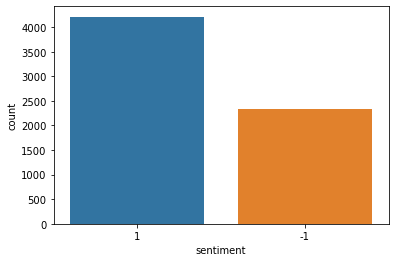

In [69]:

sns.countplot(data['sentiment'])

In [70]:

path = r'C:/Users/Nasibullah Qarizada/Desktop/vaderdataset.csv'

data.to_csv(path)

In [71]:
tweet_df = data[['clean_tweet','sentiment']]

print(tweet_df.shape)
tweet_df.head(5)

(10005, 2)


,clean_tweet,sentiment
0,maybe people covid seriously physically eviden...,None
1,funny brief spell covid day office able home i...,1
2,f covid brain washed koolaid drinking ts,None
3,los angeles times: california lawmaker scraps ...,None
4,believe it’s airborne “i went nowhere” people ...,1


In [72]:
tweet_df["sentiment"].value_counts()

1     4211
-1    2325
Name: sentiment, dtype: int64

In [73]:
sentiment_label = tweet_df.sentiment.factorize()
sentiment_label

(array([-1,  0, -1, ...,  0,  0,  0], dtype=int64),
 Index(['1', '-1'], dtype='object'))

In [74]:
tweet = tweet_df.clean_tweet.values

In [75]:
tweet_df.isnull().sum()

clean_tweet       0
sentiment      3469
dtype: int64

In [76]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tweet = tweet_df.clean_tweet.values
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweet)
vocab_size = len(tokenizer.word_index) + 1
encoded_docs = tokenizer.texts_to_sequences(tweet)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [77]:
print(tweet[0])
print(encoded_docs[0])

maybe people covid seriously physically evident chickenpox measles contagious can’t walk chickenpox infecting work school long covid thing
[135, 7, 1, 537, 1968, 3115, 3902, 1503, 1299, 105, 846, 3902, 1343, 13, 2, 33, 1, 95]


In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

embedding_vector_length = 32
model = Sequential() 
model.add(Embedding(vocab_size, embedding_vector_length, input_length=200) )
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])  
print(model.summary()) 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 200, 32)           657152    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 200, 32)          0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 50)                16600     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 673,803
Trainable params: 673,803
Non-trainable params: 0
________________________________________________

In [79]:
history = model.fit(padded_sequence,sentiment_label[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
150/251 [================>.............] - ETA: 18s - loss: -0.7395 - accuracy: 0.4135

KeyboardInterrupt: 

In [ ]:
loss,accuracy=model.evaluate(padded_sequence,sentiment_label[0],verbose=False)
print("Training Accuracy:{:.4f}".format(accuracy))

Training Accuracy:0.4878


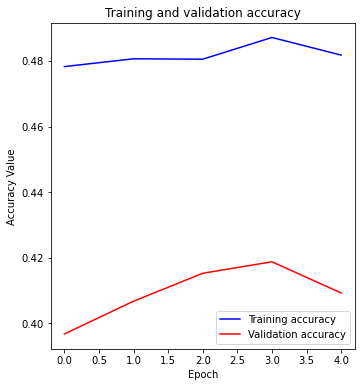

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,6))
plt.subplot (1, 2, 1)
plt.plot(acc, 'b', label='Training accuracy')
plt.plot(val_acc, 'r', label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.title('Training and validation accuracy')
plt.legend()

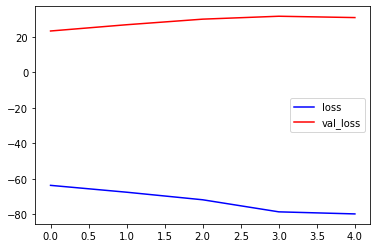

In [ ]:
plt.plot(history.history['loss'], 'b', label='loss')
plt.plot(history.history['val_loss'],'r', label='val_loss')
plt.legend()
plt.show()